In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/resultsTots-1.csv"))
results = df.select("*").toPandas()

#tipamos
results['porcentajeEtiquetado']=results['porcentajeEtiquetado'].astype(float)
results['accuracy']=results['accuracy'].astype(float)
results['AUC']=results['AUC'].astype(float)
results['PR']=results['PR'].astype(float)
results['F1score']=results['F1score'].astype(float)




def visuMetricasClasificadores(data,resultados):
  metricas = ['accuracy','AUC','PR','F1score']
  clasificadores = ['DT','LR','RF','NB','LSVM']
  colors = ['blue','green','red','cyan','magenta']
  style = ['o','x','.','+','*']
  cColors = 0
  cStyle =0
  cMetrica = 0
  fig, ax = plt.subplots(2,2,figsize=(15, 12))
  fig.suptitle(data,fontsize=20)

  for metrica in metricas:
    for clasi in clasificadores:
      resultsIntermedio=resultados[resultados['data']==data]
      resultsIntermedio=resultsIntermedio[resultsIntermedio['clasificador']==clasi]
      resultsIntermedio=resultsIntermedio[['porcentajeEtiquetado','accuracy','AUC','PR','F1score']]
      resultsIntermedio=resultsIntermedio.groupby(['porcentajeEtiquetado']).sum()
      if cMetrica<2:
        ax[0][cMetrica].plot (resultsIntermedio[metrica], color=colors[cColors],marker =style[cStyle],label = clasi)
        ax[0][cMetrica].legend()
        ax[0][cMetrica].set_xlabel('porcentaje')
        ax[0][cMetrica].set_ylabel(metrica)
      else:
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].plot (resultsIntermedio[metrica], color=colors[cColors],marker =style[cStyle],label = clasi)
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].legend()
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].set_xlabel('porcentaje')
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].set_ylabel(metrica)
      cColors = cColors +1
      cStyle = cStyle +1
    cMetrica = cMetrica +1
    cColors =0
    cStyle=0




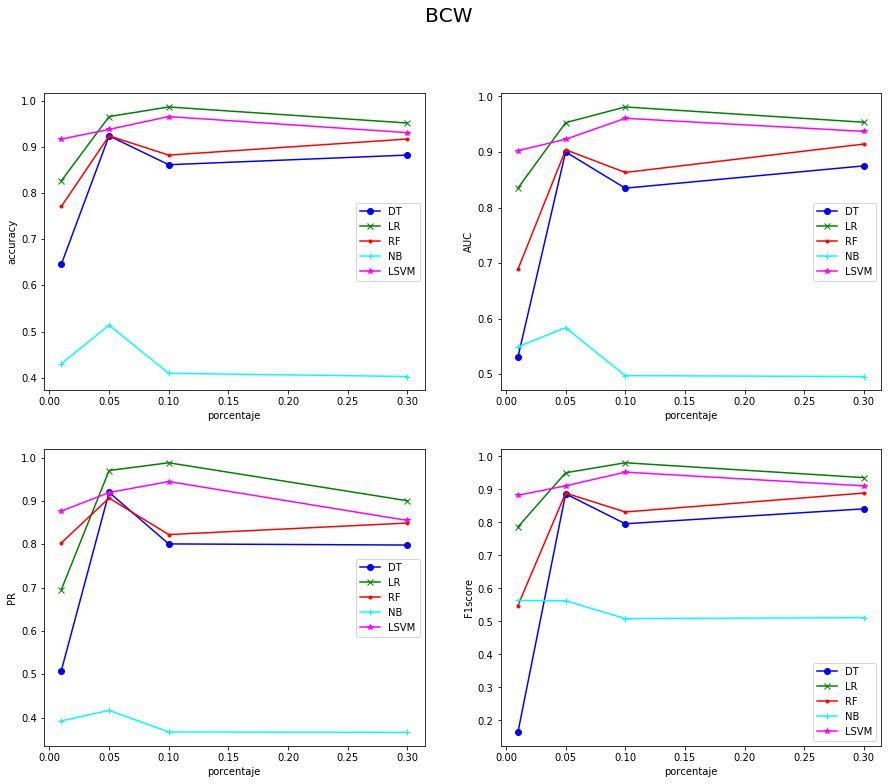

In [0]:
visuMetricasClasificadores('BCW',results)

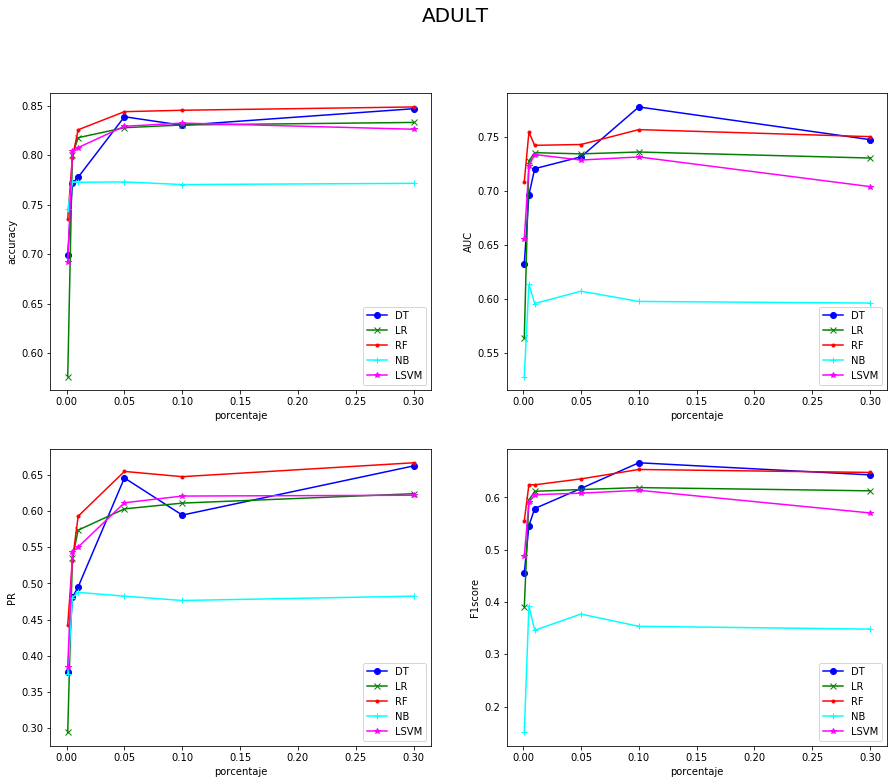

In [0]:
visuMetricasClasificadores('ADULT',results)

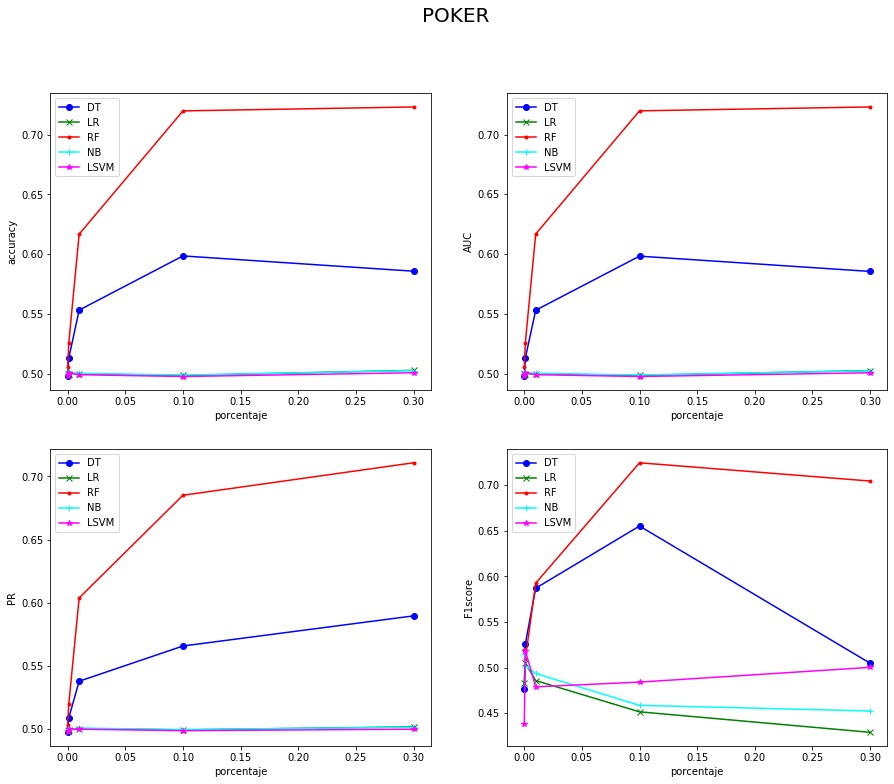

In [0]:
visuMetricasClasificadores('POKER',results)

###### Caso Poker:  LR NB y LSVM tienen un resultado muy similar (observar csv)

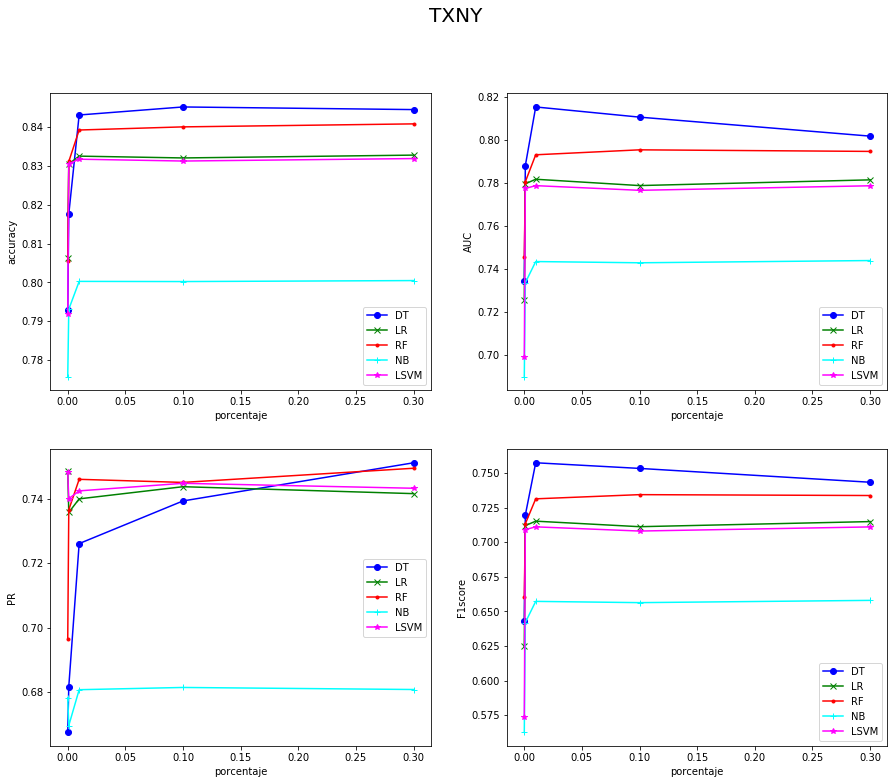

In [0]:
visuMetricasClasificadores('TXNY',results)